In [1]:
import pandas as pd
import numpy as np
import utils   # some convenient functions
import datetime

%load_ext autoreload
%autoreload 2

# 1. Johns Hopkins has international data.  And US data down to county level after 3/22/2020

In [65]:
jhs_data = utils.load_jhs_raw()

#### Cook county, IL, USA data

In [66]:
jhs_data[(jhs_data['Country_Region'] == 'US') & (jhs_data['Province_State'] == 'Illinois') & (jhs_data['Admin2'] == 'Cook')].tail()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long_,FIPS,Admin2,Active,Combined_Key,Update_Date
478,Illinois,US,2020-04-02 23:25:27,5575.0,107.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-02
484,Illinois,US,2020-04-03 22:46:37,6111.0,141.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-03
495,Illinois,US,2020-04-04 23:34:21,7439.0,167.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-04
510,Illinois,US,2020-04-05 23:06:45,8034.0,186.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-05
513,Illinois,US,2020-04-06 23:22:15,8728.0,209.0,0.0,41.841448,-87.816588,17031.0,Cook,0.0,"Cook, Illinois, US",2020-04-06


#### Plot New York State Data

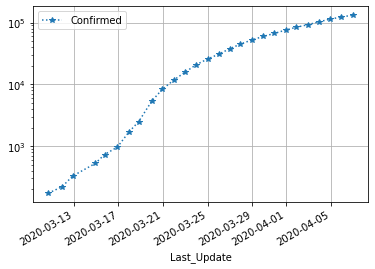

In [67]:
ny_data = jhs_data[(jhs_data['Country_Region'] == 'US') & (jhs_data['Province_State'] == 'New York')]
frm = ny_data[['Last_Update', 'Confirmed']].groupby('Last_Update').sum()
frm.plot(y='Confirmed', logy=True, grid=True, style='*:')

#### Check Italy Data (no province and state info)

In [70]:
jhs_data[jhs_data['Country_Region'] == 'Italy'].tail()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long_,FIPS,Admin2,Active,Combined_Key,Update_Date
2472,NaN,Italy,2020-04-02 23:25:14,115242.0,13915.0,18278.0,41.87194,12.56738,NaN,NaN,83049.0,Italy,2020-04-02
2528,NaN,Italy,2020-04-03 22:46:20,119827.0,14681.0,19758.0,41.87194,12.56738,NaN,NaN,85388.0,Italy,2020-04-03
2582,NaN,Italy,2020-04-04 23:34:04,124632.0,15362.0,20996.0,41.87194,12.56738,NaN,NaN,88274.0,Italy,2020-04-04
2665,NaN,Italy,2020-04-05 23:06:26,128948.0,15887.0,21815.0,41.87194,12.56738,NaN,NaN,91246.0,Italy,2020-04-05
2709,NaN,Italy,2020-04-06 23:21:55,132547.0,16523.0,22837.0,41.87194,12.56738,NaN,NaN,93187.0,Italy,2020-04-06


# 2. Testing Data From CovidTracking Project

In [72]:
import json
import urllib.request

In [73]:
url_states_current = 'https://covidtracking.com/api/states'
url_states_daily = 'https://covidtracking.com/api/states/daily'
test_daily = urllib.request.urlopen(url_states_daily).read().decode()
data_json = json.loads(test_daily)

In [81]:
data = pd.read_csv(url_states_daily + '.csv')
data['date'] = pd.to_datetime([str(d) for d in data['date']])
data = data.sort_values(by='date')

In [82]:
frm = data[data['state']=='IL']
frm.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
240,2020-04-02,IL,7695.0,35961.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,43656,43656,43656,17,16.0,0.0,2557.0,715.0,3272.0
184,2020-04-03,IL,8904.0,39144.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,48048,48048,48048,17,53.0,0.0,3183.0,1209.0,4392.0
128,2020-04-04,IL,10357.0,43224.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,53581,53581,53581,17,33.0,0.0,4080.0,1453.0,5533.0
72,2020-04-05,IL,11256.0,47727.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,58983,58983,58983,17,31.0,0.0,4503.0,899.0,5402.0
16,2020-04-06,IL,12262.0,50680.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,62942,62942,62942,17,33.0,0.0,2953.0,1006.0,3959.0


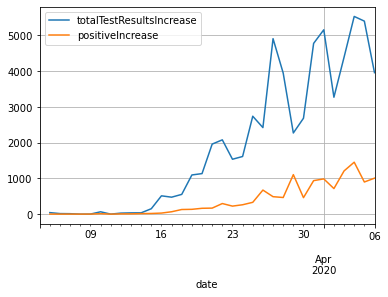

In [84]:
frm.set_index('date').plot(y=['totalTestResultsIncrease', 'positiveIncrease'], grid=True)